In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('L:/Python Projects All/UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv')
df.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend']= df['TV'] + df['radio'] + df['newspaper']
df.head(5)

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

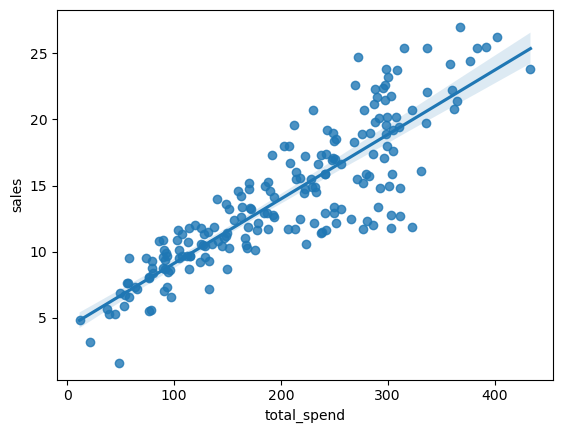

In [5]:
# making a reg plot
sns.regplot(x=df['total_spend'] , y=df['sales'] , data = df )

In [8]:
x=df['total_spend']
y=df['sales']
a,b=np.polyfit(x,y,deg=1)
print(a,b)

0.04868787931904817 4.243028216036326


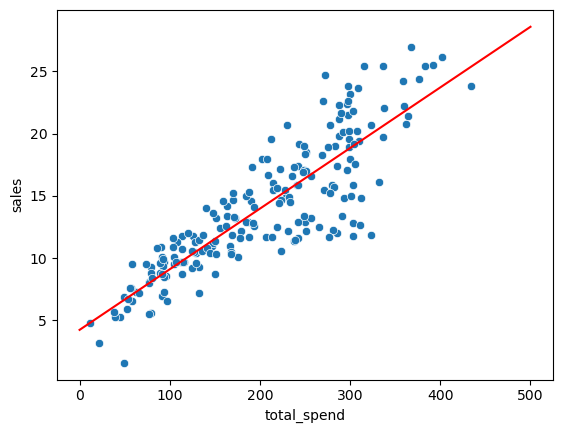

In [14]:
# plot with this
sns.scatterplot(data=df,x='total_spend',y='sales')
potential_spend = np.linspace(0,500,100)
predicted_sales = potential_spend*a + b
plt.plot(potential_spend , predicted_sales ,color='red')

In [15]:
# to get the eqation
spend = 200*a + b

In [16]:
print(spend)

13.98060407984596


In [22]:
df_salary = pd.read_csv('Practice Dataset/Salary.csv')

In [23]:
df_salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [25]:
df_salary.shape

(35, 2)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

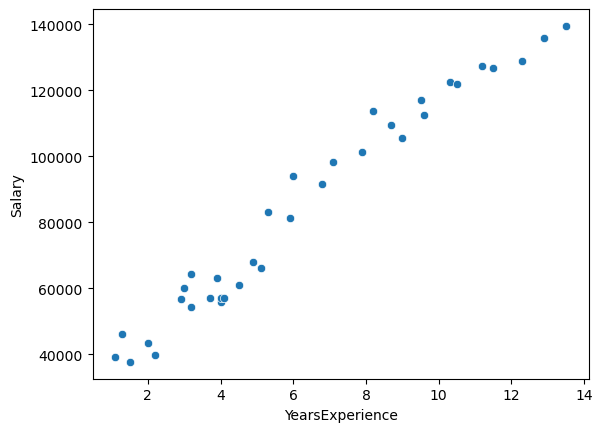

In [26]:
sns.scatterplot(x='YearsExperience' , y='Salary',data=df_salary)

In [28]:
b1 , b0 = np.polyfit(df_salary['YearsExperience'] , df_salary['Salary'] , deg=1)
print(b1 , b0)

8731.941047062492 28859.526194531496


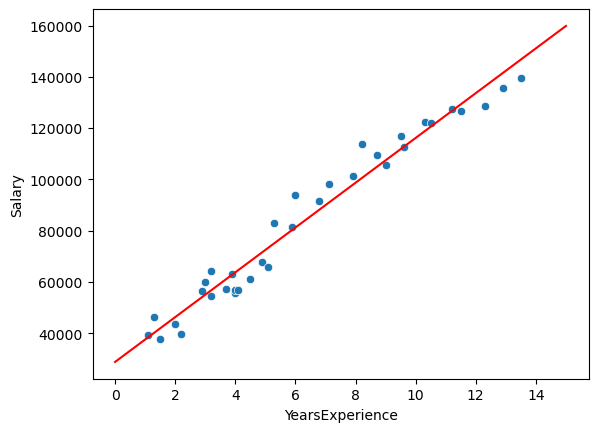

In [29]:
yoe_values = np.linspace(0,15,30)
salary_predct = 8731.941047062492 * yoe_values + 28859.526194531496
sns.scatterplot(x='YearsExperience' , y='Salary',data=df_salary)
plt.plot(yoe_values,salary_predct,color='red')

In [57]:
# another approach:
df_salary.head()
from sklearn.model_selection import train_test_split
X = df_salary.drop('Salary',axis=1)
y = df_salary['Salary']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=101)
x_train.shape

(23, 1)

In [58]:
from sklearn.linear_model import LinearRegression
mymodel = LinearRegression()
mymodel.fit(x_train,y_train)
predictions = mymodel.predict(x_test)

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

4177.750995566138

In [60]:
np.sqrt(mean_squared_error(y_test,predictions))

5557.3624543360165

In [46]:
x_test

,YearsExperience
18,5.9
7,3.2
20,6.8
34,13.5
30,11.2
26,9.5
25,9.0
27,9.6
32,12.3
2,1.5


In [47]:
y_test

18     81363
7      54445
20     91738
34    139465
30    127345
26    116969
25    105582
27    112635
32    128765
2      37731
28    122391
19     93940
Name: Salary, dtype: int64

In [48]:
predictions

array([ 80334.73257059,  56296.48493308,  88347.4817831 , 147997.94814285,
       127520.92237756, 112385.72942061, 107934.20208033, 113276.03488867,
       137314.28252618,  41161.29197613, 119508.17316506,  81225.03803865])

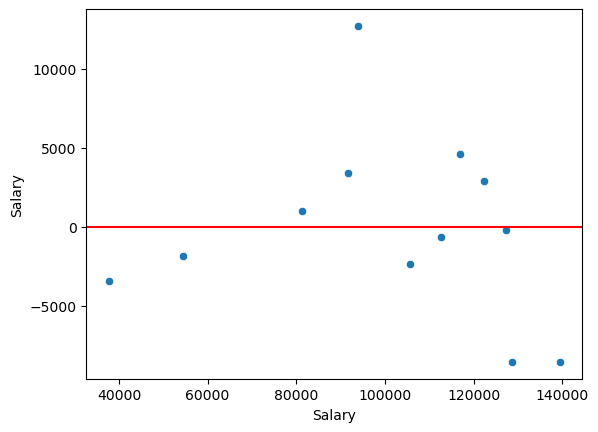

In [51]:
residual = y_test - predictions
sns.scatterplot(x=y_test , y=residual)
plt.axhline(y=0,color='r',ls='-')

In [54]:
mymodel.predict([[13]])

C:\Users\Kandarp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([143546.42080257])

In [61]:
df = pd.read_csv('L:/Python Projects All/UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv')

In [62]:
df.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [63]:
X = df[['TV','radio','newspaper']]
y = df['sales']
print(X.head(3) , y.head(3))

      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3 0    22.1
1    10.4
2     9.3
Name: sales, dtype: float64


In [65]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=101)
mymod = LinearRegression()
mymod.fit(x_train , y_train)
predictions = mymod.predict(x_test)
predictions

array([15.64343813, 19.58078283, 11.42717781, 16.90494334,  9.17645232,
        7.01921001, 20.24548588, 17.27288092,  9.81362002, 19.15221858,
       12.36281849, 13.90086335, 13.74679921, 21.16322282, 18.31876004,
        9.96472602, 15.56312703,  7.73452007,  7.57314037, 20.32745421,
        7.79414911, 18.16308067, 24.57041484, 22.71055089,  8.01558318,
       12.65730219, 21.43661308,  8.04499619, 12.43159447, 12.40259255,
       10.70029092, 19.16776811, 10.10150532,  6.69083331, 17.24889776,
        7.79224406,  9.25952001,  8.31516806, 10.51963092, 10.67086792,
       12.88094679,  9.79344981, 10.20060813,  8.013982  , 11.54267429,
       10.07800983,  8.98583386, 16.21285502, 13.20750313, 20.70094692,
       12.42670309, 13.96572233, 17.55475937, 11.15936616, 12.58108647,
        5.54230087, 23.22486082, 12.58536565, 18.76366836, 15.15376302,
       15.15931391, 23.91773675,  6.78191588, 19.84529505, 13.86858162,
       21.07676645])

In [66]:
mae = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print(mae)
print(rmse)

1.2369188494259316
1.5324409426512418
